<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Classificação

### **1.1. Motivação** 

> Dado a **largura** e o **comprimento** das pétalas e sépalas de uma flor do gênero *iris*, qual é a sua **espécie**: *versicolor*, *setosa* ou *virginica*?

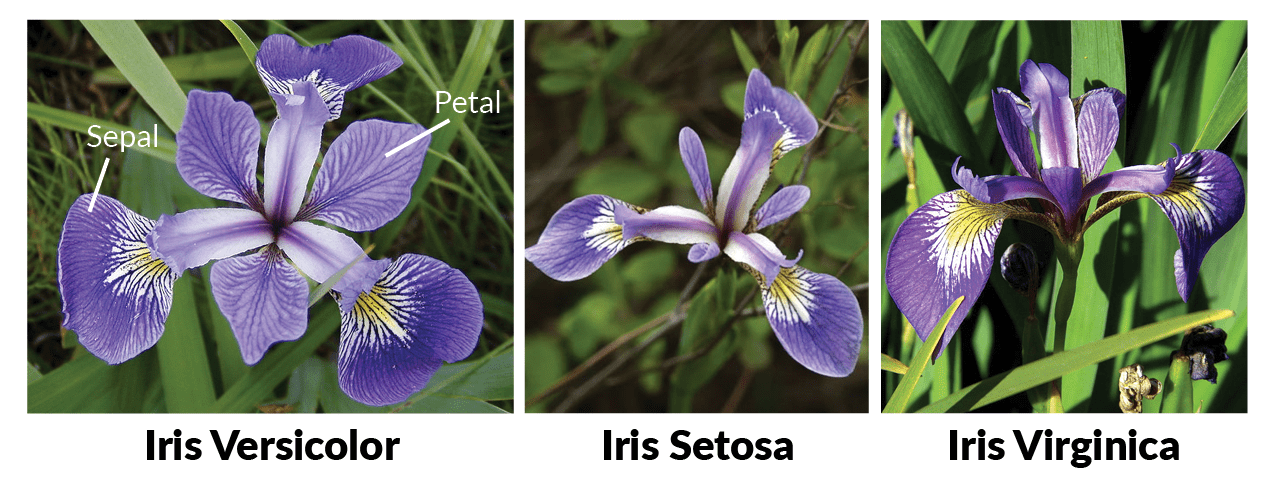

Queremos um conjunto de regras que representem essa relação. Uma possível solução seria o conjunto de condições `if-else` como no exemplo abaixo:

```python
def f(petal_length: float, petal_width: float, sepal_length: float, sepal_width: float) -> str:
  if sepal_width > 5.0:
    if petal_width > 2.0:
      return 'versicolor'
    else:
      return 'virginica'
  else:
    return 'setosa'
```

Este conjunto de regras pode ser representado gráficamente por uma **árvore de decisão**, onde as **folhas** representam as classes do atributo categórico ou variável resposta a ser predito e os **nós** as regras de decisão.

> Qual o melhor conjunto de regras (atributos e valores de corte) para esse conjunto de dados?

### **1.2. Árvore de decisão** 

A árvore de decisão é uma abordagem estatística que busca encontrar a relação entre um atributo categórico alvo $y$ (variável resposta) e um conjunto de atributos preditores $x_i$ através de um conjunto de regras simples que, quando combinadas, formam uma complexa classificação. De maneira geral, utiliza **métodos exaustivos** (força bruta) para definir a quantidade de **nós** necessário para classificar as clases do atributo alvo.


O racional por trás da construção de um nó vem do uso do conceito de **impureza** do nó.


> para cada atributo $x_i$:

>> para cada* valor $w_i$ entre $min(x_i)$ e $max(x_i)$:

>>> calcule a impureza do nó

> selecione $x_i$ e $w_i$ com a menor impureza

> crie um nó com $x_i$ e $w_i$

> repita


As métricas de impureza mais utilizadas são Gini e Entropia. Uma das grandes vantagens das árvores de decisão é a sua capacidade de **explicação** de relação entre a variável resposta e os atributos preditores, uma vez que é possível **visualiza-la**. Outra vantagem é que a técnica dispensa o tratamento dos atributos preditores (normalização, padronização, *one-hot encoding*, etc.) pois estes não são comparados entre si.

### **1.3. Pacote Scikit-Learn** 

Pacote Python para ciência de dados e *machine learning*. A documentação pode ser encontrada neste [link](https://scikit-learn.org/stable/). Possuí diversos modelos para aprendizado supervisionado, não supervisionado, etc. além de métodos auxiliares. Para a árvore de decisão, temos:

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()

## 2\. Dados

### **2.1. Pré-processamento** 

Neste módulo, vamos utilizar dados sobre as características físicas das plantas do gênero **iris**. O conjunto de dados é um dos mais famosos no aprendizado de máquina e pode ser carregado diretamente do pacote Python Seaborn. 

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [49]:
iris = sns.load_dataset('iris')

Vamos conhecer um pouco melhor o conjunto de dados.

In [50]:
iris.tail() # units in cm

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Como o objetivo é classificar plantas nas suas espécies, vamos explorar as características de cada uma:

In [52]:
iris[["species"]].drop_duplicates()

,species
0,setosa
50,versicolor
100,virginica


 - **Versicolor**

In [53]:
iris.query("species == 'versicolor'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


 - **Setosa**

In [54]:
iris.query("species == 'setosa'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


 - **Virginica**

In [55]:
iris.query("species == 'virginica'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


Nota-se que o comprimento e a largura das pétalas e sépalas diferem nas espécies. Vamos visualizar estas diferenças:

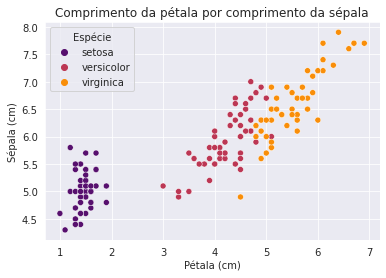

In [56]:
with sns.axes_style('darkgrid'):

  grafico = sns.scatterplot(data=iris, x="petal_length", y="sepal_length", hue="species", palette="inferno")
  grafico.set(title='Comprimento da pétala por comprimento da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

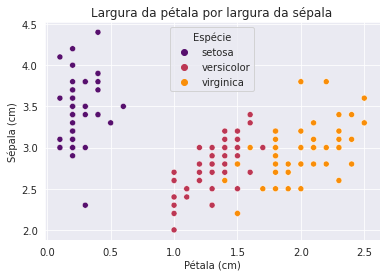

In [57]:
with sns.axes_style('darkgrid'):

  grafico = sns.scatterplot(data=iris, x="petal_width", y="sepal_width", hue="species", palette="inferno")
  grafico.set(title='Largura da pétala por largura da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

Já temos evidências suficientes para modelar a espécie como uma função do comprimento e largura de suas sépalas e pétalas:

In [58]:
data = iris[["species", "sepal_length",	"sepal_width",	"petal_length",	"petal_width"]]

In [59]:
data.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


O resultado do pré-processamento nos trás um dado limpo e pronto para ser utilizado no treino do modelo.

> Lembre-se que o modelo de classificação com a árvore de decisão não compara atributos entre si, logo, não é necessário fazer a **escala** (numéricos) ou **codificação** (categóricos) dos valores dos atributos.

In [60]:
data.query("species == 'versicolor'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
50,versicolor,7.0,3.2,4.7,1.4
51,versicolor,6.4,3.2,4.5,1.5
52,versicolor,6.9,3.1,4.9,1.5
53,versicolor,5.5,2.3,4.0,1.3
54,versicolor,6.5,2.8,4.6,1.5


In [61]:
data.query("species == 'setosa'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [62]:
data.query("species == 'virginica'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
100,virginica,6.3,3.3,6.0,2.5
101,virginica,5.8,2.7,5.1,1.9
102,virginica,7.1,3.0,5.9,2.1
103,virginica,6.3,2.9,5.6,1.8
104,virginica,6.5,3.0,5.8,2.2


### **2.2. Treino / Teste** 

De maneira geral, um modelo de aprendizagem supervisionada precisa ser treinado com um conjunto de dados e avaliado com outro, assim conseguimos enter um pouco melhor a capacidade do modelo em **generalizar** as predições com dados não visto, que é a situação real em que será utilizado. Para tanto, dividimos nossa base de dados em duas: uma maior de **treino** e uma menor de **testes**.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis=1), 
    data['species'], 
    test_size=0.25, 
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [65]:
predictors_train.head()

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2
60,5.0,2.0,3.5,1.0
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3


In [66]:
predictors_train.shape

(112, 4)

In [67]:
predictors_test.head()

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.6,1.4,0.1


In [68]:
predictors_test.shape

(38, 4)

 - **Variável resposta (target)**

In [69]:
target_train.head()

16         setosa
82     versicolor
60     versicolor
35         setosa
143     virginica
Name: species, dtype: object

In [70]:
target_train.shape

(112,)

In [71]:
target_test.head()

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: species, dtype: object

In [72]:
target_test.shape

(38,)

## 3\. Treino

O treino de modelos de aprendizagem supervisionada consiste na etapa de calculo dos parametros do modelo baseado na associação da variável resposta com os variáveis preditoras através do uso de um ou mais algoritmos. No caso da árvore de decisão, estamos interessados em encontrar um conjunto de regras simples (**nós**) que vão dividir o conjunto de dados em categorias (**folhas**) através do uso de uma métrica de **impureza**.

### **3.1. Algoritmo** 

O treino de um modelo de árvore de decisão (do pacote Python Scikit Learn) é feito através do uso do algoritmo **CART** (explicação neste [link](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29)). A explicação completa do algoritmo foge do escopo desse curso mas o raciocínio por trás é semelhante ao apresentado na aula 1 deste módulo: um processo iterativo que constrói **nós** (`if-else`) através da escolha de um atributo e um valor de corte utilizando uma métrica de **impureza**.

In [73]:
model = model.fit(predictors_train, target_train)

In [74]:
model.__dict__

{'ccp_alpha': 0.0,
 'class_weight': None,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'criterion': 'gini',
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'max_depth': None,
 'max_features': None,
 'max_features_': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_classes_': 3,
 'n_features_in_': 4,
 'n_outputs_': 1,
 'random_state': None,
 'splitter': 'best',
 'tree_': <sklearn.tree._tree.Tree at 0x7f2f124c4d50>}

Podemos visualizar a árvore de decisão gerada com o auxílio do pacote Python Graphviz.

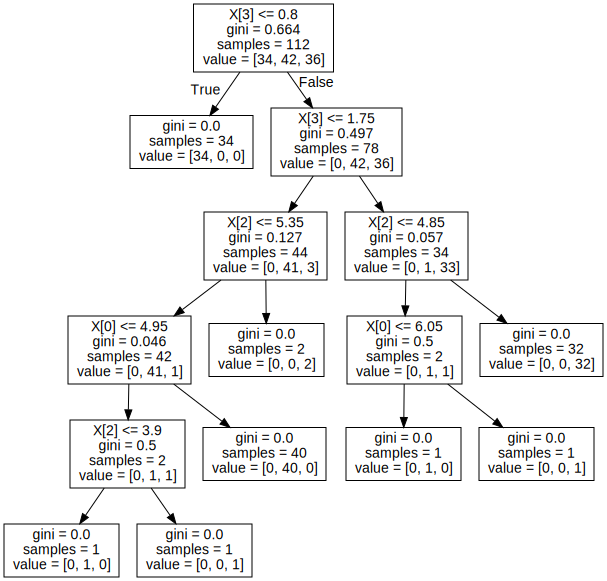

In [75]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(tree_data) 
graph

Com o modelo treinado, estamos prontos para fazer predições.

In [76]:
data.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2


In [77]:
data.tail(1)

,species,sepal_length,sepal_width,petal_length,petal_width
149,virginica,5.9,3.0,5.1,1.8


In [78]:
features = np.array([5.1, 3.5, 1.4, 0.2])
prediction = model.predict(features.reshape(1, -1))

print(prediction)

['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [79]:
features = np.array([5.9, 3.0, 5.1, 1.8])
prediction = model.predict(features.reshape(1, -1))
print(prediction)

['virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


## 4\. Avaliação

Para enter o poder preditivo do modelo de aprendizagem supervisionada, precisamos avaliar sua capacidade de generalização, ou seja, avalivar as predições em dados "não vistos" na etapa de treino. Comparamos então as predições com os dados reais através de uma métrica.

 - **Posição predita**

In [80]:
target_predicted = model.predict(predictors_test)

In [81]:
target_predicted[0:5]

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [82]:
target_predicted.shape

(38,)

 - **Posição teste**

In [83]:
target_test[0:5]

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: species, dtype: object

In [84]:
target_test.shape

(38,)

### **4.1. Matriz de confusão** 

A matriz de confusão é uma técnica que resume as predições feitas por um modelo supervisionado de classificação em uma matriz, facilitando a comparação com as classes reais. A soma dos elementos da diagonal princial da matriz apresenta a quantidade de classes corretamente classificadas. Da matriz de confusão derivam-se diversas outras métricas, como a **acurácia**.

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[16  0  0]
 [ 0  8  0]
 [ 0  3 11]]


O pacote Scikit-Learn possuí um método que facilita a visualização da matriz de confusão em um gráfico de **mapa de calor**.

In [87]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


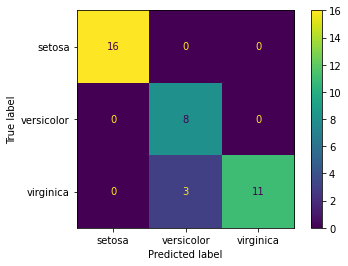

In [88]:
plot_confusion_matrix(model, predictors_test, target_test)
plt.show()

### **4.2. Acurácia** 

A **acurácia** é uma métrica que combina a exatidão (o quão certo) e a precisão (o quanto desvia) das predições de um modelo supervisionado de classificação. É definida como a soma das classificações corretas (real igual ao predito) dividida pelo total de classificações realizadas.

> $ACC(y,\hat{y}) = {\frac{\sum_{i=1}^{n} 1}{n}, \forall y_i=\hat{y}_i}$

In [89]:
total = confusion_matrix.sum()
print(total)

38


In [90]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

35


In [91]:
acuracia = acertos / total
print(acuracia)

0.9210526315789473


In [92]:
print(f"{round(100 * acuracia, 2)}%")

92.11%


O pacote Scikit-Learn possuí uma série de métodos que facilitam o cálculo de métricas de avaliação, como a **acurácia**. Uma lista completa de métricas implementadas pelo pacote por ser encontrada neste [link](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.9210526315789473


In [95]:
print(f"{round(100 * acuracia, 2)}%")

92.11%


## 5\. Predição

Com o modelo treinado, avaliado e selecionado, podemos utiliza-lo para resolver os problemas reais que motivaram sua construção.

 - **Exemplo**: Flor do gênero **íris** com sépala de 6.39cm e 2.71cm e pétala de 6.03cm e 2.23cm, sendo a primeira medida o comprimento e a segunda a largura, respectivamente.

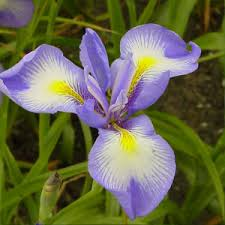

In [97]:
flor = np.array([6.39, 2.71, 6.03, 2.23])

In [98]:
especie = model.predict(flor.reshape(1, -1))
print(especie)

['virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Lembre-se que a classe predita nada mais é do que a aplicação de uma função ou conjunto de regras, com parametros "aprendidos" durante o treino do modelo, aos dados de entrada. Regras estas que, no caso da classificação por um modelo de **árvore de decisão**, podemos acompanhar visualmente:

In [99]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

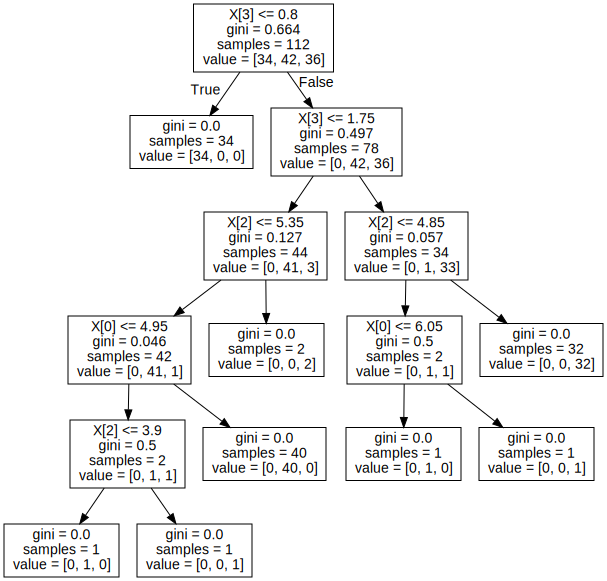

In [100]:
graph

Conclui-se então que a espécie da flor é **íris virginica**.